In [4]:
import torch
from torchvision import datasets
import torchvision.transforms as T

train_dataset = datasets.MNIST(root='data', train=True, transform=T.ToTensor(), download=True)
image, label = train_dataset[0]

image.shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])
0


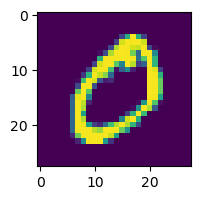

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

image, label = train_dataset[1]
print(image.shape)
print(label)

# (c, h, w) -> (h, w, c)
image = image.permute(1, 2, 0)
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.show()

In [16]:
from models.model import Unet

bs = 32
ch = 1
size = 32
timestep = 5000
down_chs = (8, 16, 32, 64, 64)
lr = 2e-4
epochs = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Unet(ch, size, down_chs, timestep).to(device)

device

'cuda'

In [17]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

405329

In [18]:
def sample_image(image):
    image = image.squeeze(0).cpu()
        
    # (c, h, w) -> (h, w, c)
    image = image.permute(1, 2, 0)
    image = torch.clip(image, 0, 1)

    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.show()

In [19]:
from torch.utils.data import DataLoader
from torch.optim import Adam
from tqdm import tqdm


train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
optimizer = Adam(model.parameters(), lr=lr)

In [20]:
model.train()
samples = []

for epoch in range(epochs):
    loader = tqdm(train_loader)
    
    for step, batch in enumerate(loader):
        image, label = batch
        
        bs_dim = image.shape[0]
        
        image = image.to(device)
        t = torch.randint(0, timestep, (bs_dim, ), device=device)
        
        optimizer.zero_grad()
        
        loss = model.get_loss(image, t)
        
        loss.backward()
        
        optimizer.step()

        loader.set_description(f'Epoch {epoch} | step: {step} | loss: {loss.item():.4f}')
    
    with torch.no_grad():
        sample = model.sampling()
        samples.append(sample)
        sample_image(sample)

  0%|          | 0/1875 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x64 and 256x64)